Challenge is to predict which African startups will make it to a Series A round.
Have over 4,000+ African companies that have raised funding and other data points about them.
Given a startup/company, can one predict probability of success. Informs sourcing and investment screening.
Leads to an investability score.
However, the recall metric for all three classifiers was very low. This means that models misclassified 70% of successful startups as unsuccessful. 
We would like the algorithm to discover more successful startups and not only those which follow the most popular patterns.

Series A financing refers to an investment in a privately-held, 
start-up company after it has shown progress in building its business model and demonstrates the potential to grow and generate revenue.

In [1]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [133]:
import pandas as pd
import numpy as np
import sklearn as sk
from matplotlib import pyplot as plt
import seaborn as sn
import seaborn as sns
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt

# Creating the modeling dataset
from sklearn.datasets import make_classification
# Data processing
#import pandas as pd
#import numpy as np
# Data visualization
#import matplotlib.pyplot as plt
#import seaborn as sns

# Model and performance
#from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Oversampling and under sampling
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter
%matplotlib inline


In [3]:
#pip install pycountry 

In [4]:
#pip install country_converter --upgrade

In [5]:
pd.set_option('display.max_columns',None)

In [6]:
#df = pd.read_csv('MOCK_DATA (2).csv')
df = pd.read_excel ('Companies.xlsx')
df.head()

,1_Company_name,2_Company_description,3_Status,4_Year_founded,5_Headquarters,6_Other_offices,7.1_Country HQ,7.2_Assigned_Country (Africa),8_Countries_of_operation_(Business Model/Market),9_Country_Parent Incorporation,10_Total_Venture_Funding (Disclosed),10.1_Funding Rounds (Named),10.2_Number of Venture Funding rounds (#),11_Investors,12_Company_Valuation,13_Company_Valuation_Date,14_Last_funding_round_raised_date,15_Last_funding_round_raised_type,16_Last funding round raised amount,17_Largest_round,18_Amount,19_Founders,20_Female_Co-Founder (Yes = 1; No = 0),21_Main_sector,22_Categories,23_Business_Model,24_Accelerators_Attended,25_Number_of_employees,26_Website,27_Linkedin,28_Twitter,29_Facebook,"Companies Information, Level of Completeness",Duplication,Companies with a Deal Check,Main Sector / Industry Check,DA Acquired or Exited or Dead,DA Classification_African Company (Yes = 0; No = 1),"Industry, DA Classified","Last Funding Round, DA Classified","Largest Funding Round, DA Classified","Stage, DA Classified",Total Number of Funding Rounds,Total Number of Venture Funding Rounds,Total Funding todate (disclosed),Total Venture funding todate (disclosed),Acquired,1. Grant,2. Seed,3. Early Venture,4. Late Venture,5. Debt Financing,6.Private Equity,7. Offerings,8. Exits,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Investors,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Duplication.1,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Average time of rounds(days),Year of recieving Series A
0,Jumia Group,Jumia is connecting consumers and businesses a...,Active,2012.0,"Lagos, Nigeria","Nigeria, Egypt, Morocco, Kenya, Ivory Coast, S...",Nigeria,Nigeria,"Nigeria, Egypt, Morocco, Kenya, Ivory Coast, S...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Series C,409806000,Series C,409806000,"Jeremy Hodara, Sacha Poignonnec",NaN,E-Commerce & Retail,"E-Commerce, Internet, Shopping Online",NaN,NaN,1001 - 5000,https://group.jumia.com/,https://www.linkedin.com/company/jumia-group/,https://twitter.com/Jumia_Group,https://www.facebook.com/jumiagroup/,0.709677,NaN,Jumia Group,1.0,Jumia Group,0.0,E-commerce & Retail,4. Late Venture,4. Late Venture,Growth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jumia GroupJumia is connecting consumers and b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,529.0,2012.0
1,Andela,Andela invests in Africa’s most talented softw...,Active,2014.0,"New York, united States","Nigeria, Kenya, Uganda, Rwanda",United States,Nigeria,"Nigeria, Kenya, Uganda, Rwanda",NaN,NaN,NaN,NaN,"Chan Zuckerberg Initiative, CRE Venture Capita...",NaN,NaN,2019-01-23 00:00:00,Series D,100000000,Series D,100000000,"Brice Steven Nkengsa, Christina Sass, Ian Carn...",1,Commercial & Professional Services,"Edtech, BPO, Recruitment, Software, Training",B2B,Extreme Accelerator,500+,https://andela.com,https://www.linkedin.com/company/andela/,https://twitter.com/andela,https://www.facebook.com/pg/thisisandela/about/,0.870968,NaN,Andela,1.0,NaN,NaN,Other Technologies & Information Technology,4. Late Venture,4. Late Venture,Growth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AndelaAndela invests in Africa’s most talented...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [7]:
df.shape

(3084, 118)

In [8]:
df_deals = pd.read_excel ('Deals (investment).xlsx')
#df_deals.head()

In [9]:
a=df_deals['2_post_title'].unique().tolist()
#a

In [10]:
len(a)


801

In [11]:
df_new = df_deals[['2_post_title','1_post_date']]
#brics[["country", "capital"]]
df_new.head()
df_andela = df_new.loc[df_new['2_post_title'] == "Livestock Wealth"]
df_andela

,2_post_title,1_post_date
1248,Livestock Wealth,2019-09-02


In [12]:
#df_andela.set_index('Year').diff()
df_andela['A_dif'] = df_andela['1_post_date'].diff()
df_andela['A_dif']

<ipython-input-12-0882acad289e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_andela['A_dif'] = df_andela['1_post_date'].diff()


1248   NaT
Name: A_dif, dtype: timedelta64[ns]

In [13]:
#df_andela['A_dif'].fillnat(0)

#df["weight"].mean()

In [14]:
df_andela['A_dif'].mean()

NaT

In [15]:
#df.drop["Unnamed:66","Unnamed:67","Unnamed:68","Unnamed:69","Unnamed:70"]
df_needed=df.drop(['Unnamed: 66','Unnamed: 67','Unnamed: 68','Unnamed: 69','Unnamed: 70','Unnamed: 71','Unnamed: 72',
         'Unnamed: 73','Unnamed: 74','Unnamed: 75','Unnamed: 76','Unnamed: 77','Unnamed: 78','Unnamed: 79','Unnamed: 80',
         'Unnamed: 82','Unnamed: 83','Unnamed: 84','Unnamed: 85','Unnamed: 86','Unnamed: 87','Unnamed: 88','Unnamed: 89',
         'Unnamed: 90','Unnamed: 91',
         'Unnamed: 92','Unnamed: 93','Unnamed: 94','Unnamed: 95','Unnamed: 96','Unnamed: 97','Unnamed: 98','Unnamed: 100',
         'Unnamed: 101','Unnamed: 102','Unnamed: 103','Unnamed: 104','Unnamed: 105','Unnamed: 106','Unnamed: 107','Unnamed: 108',
         'Unnamed: 109','Unnamed: 110','Unnamed: 111','Unnamed: 112','Unnamed: 113','Unnamed: 114','Unnamed: 115','Unnamed: 99'], axis = 1)
df_needed.head()

,1_Company_name,2_Company_description,3_Status,4_Year_founded,5_Headquarters,6_Other_offices,7.1_Country HQ,7.2_Assigned_Country (Africa),8_Countries_of_operation_(Business Model/Market),9_Country_Parent Incorporation,10_Total_Venture_Funding (Disclosed),10.1_Funding Rounds (Named),10.2_Number of Venture Funding rounds (#),11_Investors,12_Company_Valuation,13_Company_Valuation_Date,14_Last_funding_round_raised_date,15_Last_funding_round_raised_type,16_Last funding round raised amount,17_Largest_round,18_Amount,19_Founders,20_Female_Co-Founder (Yes = 1; No = 0),21_Main_sector,22_Categories,23_Business_Model,24_Accelerators_Attended,25_Number_of_employees,26_Website,27_Linkedin,28_Twitter,29_Facebook,"Companies Information, Level of Completeness",Duplication,Companies with a Deal Check,Main Sector / Industry Check,DA Acquired or Exited or Dead,DA Classification_African Company (Yes = 0; No = 1),"Industry, DA Classified","Last Funding Round, DA Classified","Largest Funding Round, DA Classified","Stage, DA Classified",Total Number of Funding Rounds,Total Number of Venture Funding Rounds,Total Funding todate (disclosed),Total Venture funding todate (disclosed),Acquired,1. Grant,2. Seed,3. Early Venture,4. Late Venture,5. Debt Financing,6.Private Equity,7. Offerings,8. Exits,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Investors,Duplication.1,Average time of rounds(days),Year of recieving Series A
0,Jumia Group,Jumia is connecting consumers and businesses a...,Active,2012.0,"Lagos, Nigeria","Nigeria, Egypt, Morocco, Kenya, Ivory Coast, S...",Nigeria,Nigeria,"Nigeria, Egypt, Morocco, Kenya, Ivory Coast, S...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Series C,409806000,Series C,409806000,"Jeremy Hodara, Sacha Poignonnec",NaN,E-Commerce & Retail,"E-Commerce, Internet, Shopping Online",NaN,NaN,1001 - 5000,https://group.jumia.com/,https://www.linkedin.com/company/jumia-group/,https://twitter.com/Jumia_Group,https://www.facebook.com/jumiagroup/,0.709677,NaN,Jumia Group,1.0,Jumia Group,0.0,E-commerce & Retail,4. Late Venture,4. Late Venture,Growth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jumia GroupJumia is connecting consumers and b...,529.0,2012.0
1,Andela,Andela invests in Africa’s most talented softw...,Active,2014.0,"New York, united States","Nigeria, Kenya, Uganda, Rwanda",United States,Nigeria,"Nigeria, Kenya, Uganda, Rwanda",NaN,NaN,NaN,NaN,"Chan Zuckerberg Initiative, CRE Venture Capita...",NaN,NaN,2019-01-23 00:00:00,Series D,100000000,Series D,100000000,"Brice Steven Nkengsa, Christina Sass, Ian Carn...",1,Commercial & Professional Services,"Edtech, BPO, Recruitment, Software, Training",B2B,Extreme Accelerator,500+,https://andela.com,https://www.linkedin.com/company/andela/,https://twitter.com/andela,https://www.facebook.com/pg/thisisandela/about/,0.870968,NaN,Andela,1.0,NaN,NaN,Other Technologies & Information Technology,4. Late Venture,4. Late Venture,Growth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AndelaAndela invests in Africa’s most talented...,395.0,2015.0
2,Takealot,takealot.com is one of SA's largest online ret...,Acquired,2011.0,"Cape Town, South Africa",NaN,South Africa,South Africa,South Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Venture Round,69000000,Venture Round,100000000,Kim Reid,NaN,E-Commerce & Retail,"E-Commerce, Logistics, Retail",NaN,NaN,1001-5000,https://www.takealot.com/,https://www.linkedin.com/company/takealot/,https://twitter.com/takealot,https://www.facebook.com/Takealot,0.677419,NaN,Takealot,1.0,Takealot,0.0,E-commerce & Retail,4. Late Venture,4. Late Venture,Growth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Takealottakealot.com is one of SA's largest on...,1054.0,NaN
3,Zola Electric,ZOLA Electric (formerly Off Grid Electric) is ...,Active,2011.0,"Arusha, Tanzania",NaN,Tanzania,Tanzania,Tanzania,NaN,NaN,NaN,NaN,"GE Ventures, Helios Investment Partne

In [16]:
#df_needed['Average time of rounds(days)'].isnull().sum()
df_needed.shape

(3084, 69)

In [17]:
#df_needed['20_Female_Co-Founder (Yes = 1; No = 0)'].values 

In [18]:
df_needed["7.2_Assigned_Country (Africa)"].fillna("Not known", inplace = True) #replacing nan values with a string,not known
df_needed['7.2_Assigned_Country (Africa)'].isnull().sum()

0

In [19]:
df_needed["2_Company_description"].fillna("Not known", inplace = True) #replacing nan values with a string,not known
df_needed['2_Company_description'].isnull().sum()

0

In [20]:
df_needed["8_Countries_of_operation_(Business Model/Market)"].fillna("Not known", inplace = True) #replacing nan values with a string,not known
df_needed['8_Countries_of_operation_(Business Model/Market)'].isnull().sum()

0

In [21]:
df_needed["21_Main_sector"].fillna("Not known", inplace = True) #replacing nan values with a string,not known
df_needed['21_Main_sector'].isnull().sum()

0

In [22]:
df_needed["11_Investors"].fillna("Not known", inplace = True) #replacing nan values with a string,not known
df_needed['11_Investors'].isnull().sum()

0

In [23]:
df_needed["19_Founders"].fillna("Not known", inplace = True) #replacing nan values with a string,not known
df_needed['19_Founders'].isnull().sum()

0

In [24]:
df_needed["22_Categories"].fillna("Not known", inplace = True)
df_needed['22_Categories'].isnull().sum()

0

In [25]:
#6_Other_offices
df_needed["6_Other_offices"].fillna("Not known", inplace = True)
df_needed['6_Other_offices'].isnull().sum()

0

In [26]:
#Counting the numbers of countires where there are business market.
df_needed['number of market countires'] = df_needed['8_Countries_of_operation_(Business Model/Market)'].apply(lambda x: len(x.split(','))if x != 'Not known' else 0)
#df_needed.head()

In [27]:
#Counting the numbers of investors a company has.
df_needed['number of investors'] = df_needed['11_Investors'].apply(lambda x: len(x.split(','))if x != 'Not known' else 0)
#df_needed.head()

In [28]:
#19_Founders
#Counting the numbers of founders a company has.
df_needed['number of founders'] = df_needed['19_Founders'].apply(lambda x: len(x.split(','))if x != 'Not known' else 0)
#df_needed.head()

In [29]:
#Counting the numbers of bussiness categories a company has.
df_needed['number of bussiness categories'] = df_needed['22_Categories'].apply(lambda x: len(x.split(','))if x != 'Not known' else 0)
#df_needed.head()

In [30]:
#Counting the numbers of Other offices a company has.
df_needed['number of other offices'] = df_needed['6_Other_offices'].apply(lambda x: len(x.split(','))if x != 'Not known' else 0)
df_needed.head()

,1_Company_name,2_Company_description,3_Status,4_Year_founded,5_Headquarters,6_Other_offices,7.1_Country HQ,7.2_Assigned_Country (Africa),8_Countries_of_operation_(Business Model/Market),9_Country_Parent Incorporation,10_Total_Venture_Funding (Disclosed),10.1_Funding Rounds (Named),10.2_Number of Venture Funding rounds (#),11_Investors,12_Company_Valuation,13_Company_Valuation_Date,14_Last_funding_round_raised_date,15_Last_funding_round_raised_type,16_Last funding round raised amount,17_Largest_round,18_Amount,19_Founders,20_Female_Co-Founder (Yes = 1; No = 0),21_Main_sector,22_Categories,23_Business_Model,24_Accelerators_Attended,25_Number_of_employees,26_Website,27_Linkedin,28_Twitter,29_Facebook,"Companies Information, Level of Completeness",Duplication,Companies with a Deal Check,Main Sector / Industry Check,DA Acquired or Exited or Dead,DA Classification_African Company (Yes = 0; No = 1),"Industry, DA Classified","Last Funding Round, DA Classified","Largest Funding Round, DA Classified","Stage, DA Classified",Total Number of Funding Rounds,Total Number of Venture Funding Rounds,Total Funding todate (disclosed),Total Venture funding todate (disclosed),Acquired,1. Grant,2. Seed,3. Early Venture,4. Late Venture,5. Debt Financing,6.Private Equity,7. Offerings,8. Exits,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Investors,Duplication.1,Average time of rounds(days),Year of recieving Series A,number of market countires,number of investors,number of founders,number of bussiness categories,number of other offices
0,Jumia Group,Jumia is connecting consumers and businesses a...,Active,2012.0,"Lagos, Nigeria","Nigeria, Egypt, Morocco, Kenya, Ivory Coast, S...",Nigeria,Nigeria,"Nigeria, Egypt, Morocco, Kenya, Ivory Coast, S...",NaN,NaN,NaN,NaN,Not known,NaN,NaN,NaN,Series C,409806000,Series C,409806000,"Jeremy Hodara, Sacha Poignonnec",NaN,E-Commerce & Retail,"E-Commerce, Internet, Shopping Online",NaN,NaN,1001 - 5000,https://group.jumia.com/,https://www.linkedin.com/company/jumia-group/,https://twitter.com/Jumia_Group,https://www.facebook.com/jumiagroup/,0.709677,NaN,Jumia Group,1.0,Jumia Group,0.0,E-commerce & Retail,4. Late Venture,4. Late Venture,Growth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jumia GroupJumia is connecting consumers and b...,529.0,2012.0,14,0,2,3,14
1,Andela,Andela invests in Africa’s most talented softw...,Active,2014.0,"New York, united States","Nigeria, Kenya, Uganda, Rwanda",United States,Nigeria,"Nigeria, Kenya, Uganda, Rwanda",NaN,NaN,NaN,NaN,"Chan Zuckerberg Initiative, CRE Venture Capita...",NaN,NaN,2019-01-23 00:00:00,Series D,100000000,Series D,100000000,"Brice Steven Nkengsa, Christina Sass, Ian Carn...",1,Commercial & Professional Services,"Edtech, BPO, Recruitment, Software, Training",B2B,Extreme Accelerator,500+,https://andela.com,https://www.linkedin.com/company/andela/,https://twitter.com/andela,https://www.facebook.com/pg/thisisandela/about/,0.870968,NaN,Andela,1.0,NaN,NaN,Other Technologies & Information Technology,4. Late Venture,4. Late Venture,Growth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AndelaAndela invests in Africa’s most talented...,395.0,2015.0,4,6,6,5,4
2,Takealot,takealot.com is one of SA's largest online ret...,Acquired,2011.0,"Cape Town, South Africa",Not known,South Africa,South Africa,South Africa,NaN,NaN,NaN,NaN,Not known,NaN,NaN,NaN,Venture Round,69000000,Venture Round,100000000,Kim Reid,NaN,E-Commerce & Retail,"E-Commerce, Logistics, Retail",NaN,NaN,1001-5000,https://www.takealot.com/,https://www.linkedin.com/company/takealot/,https://twitter.com/takealot,https://www.facebook.com/Takealot,0.677419,NaN,Takealot,1.0,Takealot,0.0,E-commerce & Retail,4. Late Venture,4. Late Venture,Growth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Takealottakealot.com is one of SA's largest on...,1054.0,NaN,1,0,1,3,0
3,Zola Electr

In [31]:
#Using lambda functions in sorting and filtering data

In [32]:
#creating new columns with binary values
df_needed['Assigned_Country_Nigeria'] = df_needed['7.2_Assigned_Country (Africa)'].apply(lambda x: 1 if x=='Nigeria' else 0)
df_needed['Assigned_Country_South Africa'] = df_needed['7.2_Assigned_Country (Africa)'].apply(lambda x: 1 if x=='South Africa' else 0)
df_needed['Assigned_Country_Kenya'] = df_needed['7.2_Assigned_Country (Africa)'].apply(lambda x: 1 if x=='Kenya' else 0)
df_needed['Assigned_Country_Egypt'] = df_needed['7.2_Assigned_Country (Africa)'].apply(lambda x: 1 if x=='Egypt' else 0)
#df_needed.head()
#df_needed['7.2_Assigned_Country (Africa)'].value_counts() 

In [33]:
df_needed['Business_operated in South Africa'] = df_needed['8_Countries_of_operation_(Business Model/Market)'].apply(lambda x: 1 if 'South Africa' in x.split(',') else 0) #those with python give 1 or else 0
df_needed['Business_operated in Nigeria'] = df_needed['8_Countries_of_operation_(Business Model/Market)'].apply(lambda x: 1 if 'Nigeria' in x.split(',') else 0)
df_needed['Business_operated in Kenya'] = df_needed['8_Countries_of_operation_(Business Model/Market)'].apply(lambda x: 1 if 'Kenya' in x.split(',') else 0)
df_needed['Business_operated in Egypt'] = df_needed['8_Countries_of_operation_(Business Model/Market)'].apply(lambda x: 1 if 'Egypt' in x.split(',') else 0)
#df_needed['Business_operated in Egypt'].value_counts() 
#df_needed.head()
#df_needed['8_Countries_of_operation_(Business Model/Market)'].value_counts() 

In [34]:
#df_needed['21_Main_sector'].value_counts() 

In [35]:
df_needed['Sector_Financial Services'] = df_needed['21_Main_sector'].apply(lambda x: 1 if 'Financial Services' in x.split('&') else 0)
df_needed['Sector_Information Technology'] = df_needed['21_Main_sector'].apply(lambda x: 1 if 'Information Technology' in x.split('&') else 0)
df_needed['Sector_E-Commerce & Retail'] = df_needed['21_Main_sector'].apply(lambda x: 1 if 'E-Commerce & Retail' in x.split('&') else 0)
df_needed['Sector_Commercial & Professional Services'] = df_needed['21_Main_sector'].apply(lambda x: 1 if 'Commercial & Professional Services' in x.split('&') else 0)
#df_needed['Sector_Commercial & Professional Services'].value_counts() 
#df_needed.head()

In [36]:
#global   checking out company descriptions with global
df_needed['global_Company'] = df_needed['2_Company_description'].apply(lambda x: 1 if '' in x.lower() else 0) #those with global  give 1 or else 0
df_needed['global_Company'].value_counts()   #counting the jobs with thedescription python 
#df_needed.head()

1    3084
Name: global_Company, dtype: int64

In [37]:
#df_needed['23_Business_Model'].value_counts()
#df_needed['23_Business_Model'].isnull().sum()
df_needed["23_Business_Model"].fillna("Not known", inplace = True) #replacing nan values with a string,not known
df_needed['23_Business_Model'].isnull().sum()

0

In [38]:
df_needed['Business_model_B2C'] = df_needed['23_Business_Model'].apply(lambda x: 1 if 'B2C' in x.split('/') else 0)
df_needed['Business_model_B2B'] = df_needed['23_Business_Model'].apply(lambda x: 1 if 'B2B' in x.split('/') else 0)
#df_needed['Business_model_B2C'].value_counts() 
#df_needed.head()

In [39]:
df_needed['Female_Co-Founder'] = df_needed['20_Female_Co-Founder (Yes = 1; No  = 0)'].apply(lambda x: 1 if x==1 else 0)
df_needed['Male_Co-Founder'] = df_needed['20_Female_Co-Founder (Yes = 1; No  = 0)'].apply(lambda x: 1 if x==0 else 0)
df_needed.head() 

,1_Company_name,2_Company_description,3_Status,4_Year_founded,5_Headquarters,6_Other_offices,7.1_Country HQ,7.2_Assigned_Country (Africa),8_Countries_of_operation_(Business Model/Market),9_Country_Parent Incorporation,10_Total_Venture_Funding (Disclosed),10.1_Funding Rounds (Named),10.2_Number of Venture Funding rounds (#),11_Investors,12_Company_Valuation,13_Company_Valuation_Date,14_Last_funding_round_raised_date,15_Last_funding_round_raised_type,16_Last funding round raised amount,17_Largest_round,18_Amount,19_Founders,20_Female_Co-Founder (Yes = 1; No = 0),21_Main_sector,22_Categories,23_Business_Model,24_Accelerators_Attended,25_Number_of_employees,26_Website,27_Linkedin,28_Twitter,29_Facebook,"Companies Information, Level of Completeness",Duplication,Companies with a Deal Check,Main Sector / Industry Check,DA Acquired or Exited or Dead,DA Classification_African Company (Yes = 0; No = 1),"Industry, DA Classified","Last Funding Round, DA Classified","Largest Funding Round, DA Classified","Stage, DA Classified",Total Number of Funding Rounds,Total Number of Venture Funding Rounds,Total Funding todate (disclosed),Total Venture funding todate (disclosed),Acquired,1. Grant,2. Seed,3. Early Venture,4. Late Venture,5. Debt Financing,6.Private Equity,7. Offerings,8. Exits,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Investors,Duplication.1,Average time of rounds(days),Year of recieving Series A,number of market countires,number of investors,number of founders,number of bussiness categories,number of other offices,Assigned_Country_Nigeria,Assigned_Country_South Africa,Assigned_Country_Kenya,Assigned_Country_Egypt,Business_operated in South Africa,Business_operated in Nigeria,Business_operated in Kenya,Business_operated in Egypt,Sector_Financial Services,Sector_Information Technology,Sector_E-Commerce & Retail,Sector_Commercial & Professional Services,global_Company,Business_model_B2C,Business_model_B2B,Female_Co-Founder,Male_Co-Founder
0,Jumia Group,Jumia is connecting consumers and businesses a...,Active,2012.0,"Lagos, Nigeria","Nigeria, Egypt, Morocco, Kenya, Ivory Coast, S...",Nigeria,Nigeria,"Nigeria, Egypt, Morocco, Kenya, Ivory Coast, S...",NaN,NaN,NaN,NaN,Not known,NaN,NaN,NaN,Series C,409806000,Series C,409806000,"Jeremy Hodara, Sacha Poignonnec",NaN,E-Commerce & Retail,"E-Commerce, Internet, Shopping Online",Not known,NaN,1001 - 5000,https://group.jumia.com/,https://www.linkedin.com/company/jumia-group/,https://twitter.com/Jumia_Group,https://www.facebook.com/jumiagroup/,0.709677,NaN,Jumia Group,1.0,Jumia Group,0.0,E-commerce & Retail,4. Late Venture,4. Late Venture,Growth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jumia GroupJumia is connecting consumers and b...,529.0,2012.0,14,0,2,3,14,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,Andela,Andela invests in Africa’s most talented softw...,Active,2014.0,"New York, united States","Nigeria, Kenya, Uganda, Rwanda",United States,Nigeria,"Nigeria, Kenya, Uganda, Rwanda",NaN,NaN,NaN,NaN,"Chan Zuckerberg Initiative, CRE Venture Capita...",NaN,NaN,2019-01-23 00:00:00,Series D,100000000,Series D,100000000,"Brice Steven Nkengsa, Christina Sass, Ian Carn...",1,Commercial & Professional Services,"Edtech, BPO, Recruitment, Software, Training",B2B,Extreme Accelerator,500+,https://andela.com,https://www.linkedin.com/company/andela/,https://twitter.com/andela,https://www.facebook.com/pg/thisisandela/about/,0.870968,NaN,Andela,1.0,NaN,NaN,Other Technologies & Information Technology,4. Late Venture,4. Late Venture,Growth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AndelaAndela invests in Africa’s most talented...,395.0,2015.0,4,6,6,5,4,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0
2,Takealot,takealot.com is one of SA's largest online ret...,Acquired,2011.0,"Cape Town, South Africa",Not known,South Africa,South Africa,South Africa,NaN,NaN,NaN,NaN,Not known,NaN,NaN,NaN,Venture Round,69000000,Venture Round

In [40]:
#df_needed["25_Number_of_employees"].fillna("0", inplace = True)
#df_needed['25_Number_of_employees'].isnull().sum()

In [41]:
#df_needed['employees'] = df_needed['25_Number_of_employees'].apply(lambda x: x.replace('1001 - 5000', '1'))

In [42]:
df_needed.loc[df_needed['25_Number_of_employees'] == '2019-10-2']

,1_Company_name,2_Company_description,3_Status,4_Year_founded,5_Headquarters,6_Other_offices,7.1_Country HQ,7.2_Assigned_Country (Africa),8_Countries_of_operation_(Business Model/Market),9_Country_Parent Incorporation,10_Total_Venture_Funding (Disclosed),10.1_Funding Rounds (Named),10.2_Number of Venture Funding rounds (#),11_Investors,12_Company_Valuation,13_Company_Valuation_Date,14_Last_funding_round_raised_date,15_Last_funding_round_raised_type,16_Last funding round raised amount,17_Largest_round,18_Amount,19_Founders,20_Female_Co-Founder (Yes = 1; No = 0),21_Main_sector,22_Categories,23_Business_Model,24_Accelerators_Attended,25_Number_of_employees,26_Website,27_Linkedin,28_Twitter,29_Facebook,"Companies Information, Level of Completeness",Duplication,Companies with a Deal Check,Main Sector / Industry Check,DA Acquired or Exited or Dead,DA Classification_African Company (Yes = 0; No = 1),"Industry, DA Classified","Last Funding Round, DA Classified","Largest Funding Round, DA Classified","Stage, DA Classified",Total Number of Funding Rounds,Total Number of Venture Funding Rounds,Total Funding todate (disclosed),Total Venture funding todate (disclosed),Acquired,1. Grant,2. Seed,3. Early Venture,4. Late Venture,5. Debt Financing,6.Private Equity,7. Offerings,8. Exits,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Investors,Duplication.1,Average time of rounds(days),Year of recieving Series A,number of market countires,number of investors,number of founders,number of bussiness categories,number of other offices,Assigned_Country_Nigeria,Assigned_Country_South Africa,Assigned_Country_Kenya,Assigned_Country_Egypt,Business_operated in South Africa,Business_operated in Nigeria,Business_operated in Kenya,Business_operated in Egypt,Sector_Financial Services,Sector_Information Technology,Sector_E-Commerce & Retail,Sector_Commercial & Professional Services,global_Company,Business_model_B2C,Business_model_B2B,Female_Co-Founder,Male_Co-Founder


In [43]:
df_needed['25_Number_of_employees'].unique()

array(['1001 - 5000', '500+', '1001-5000', '201-500', '51-100', '251-500',
       '501-1000', '250-500', '101-250', '11-50', nan, '51-200',
       datetime.datetime(2019, 2, 10, 0, 0), '51 - 100',
       datetime.datetime(2021, 1, 10, 0, 0),
       datetime.datetime(2018, 1, 10, 0, 0), '10,000+', '500-1000',
       '10000+', '1-50', '10-50', '101-150',
       datetime.datetime(2021, 11, 10, 0, 0), '5001-1000',
       datetime.datetime(2021, 11, 5, 0, 0),
       datetime.datetime(2021, 2, 10, 0, 0)], dtype=object)

In [44]:
from datetime import datetime

In [45]:
#datetime.datetime(2019, 2, 10, 0, 0)
df_needed['25_Number_of_employees'].replace({"datetime.datetime(2019, 2, 10, 0, 0)":'0'}, inplace=True)

In [46]:
#df_needed.loc[df_needed['25_Number_of_employees'] == '']

[Text(0, 0, '1001 - 5000'),
 Text(1, 0, '500+'),
 Text(2, 0, '1001-5000'),
 Text(3, 0, '201-500'),
 Text(4, 0, '51-100'),
 Text(5, 0, '251-500'),
 Text(6, 0, '501-1000'),
 Text(7, 0, '250-500'),
 Text(8, 0, '101-250'),
 Text(9, 0, '11-50'),
 Text(10, 0, '51-200'),
 Text(11, 0, '2019-02-10 00:00:00'),
 Text(12, 0, '51 - 100'),
 Text(13, 0, '2021-01-10 00:00:00'),
 Text(14, 0, '2018-01-10 00:00:00'),
 Text(15, 0, '10,000+'),
 Text(16, 0, '500-1000'),
 Text(17, 0, '10000+'),
 Text(18, 0, '1-50'),
 Text(19, 0, '10-50'),
 Text(20, 0, '101-150'),
 Text(21, 0, '2021-11-10 00:00:00'),
 Text(22, 0, '5001-1000'),
 Text(23, 0, '2021-11-05 00:00:00'),
 Text(24, 0, '2021-02-10 00:00:00')]

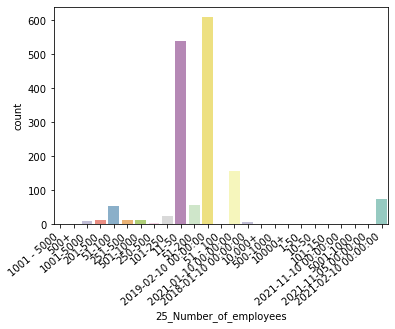

In [47]:
ax=sns.countplot(x = '25_Number_of_employees', data = df_needed, palette = 'Set3' )
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

In [48]:
df_needed['25_Number_of_employees'].dtypes

dtype('O')

In [49]:
df_needed.shape

(3084, 91)

In [50]:
#df_needed['21_Main_sector'].value_counts()

In [51]:
#to remove null values in the last funding column consideredas the target variable
df_needed.dropna(subset=['15_Last_funding_round_raised_type'], inplace=True)

In [52]:
df_needed.shape

(675, 91)

In [53]:
#df_needed['4_Year_founded'].value_counts()

In [54]:
df_needed.drop(df_needed.index[df_needed['15_Last_funding_round_raised_type'] == '-'], inplace = True)

In [55]:
df_needed.shape

(663, 91)

In [56]:
df_needed['15_Last_funding_round_raised_type'].replace({'Seed':0, 'Grant':0, 'Series A':1,'Venture Round':0,'Pre-Seed':0,
                                       'Series B':1,'Angel':0,'Debt Financing':0,'Private Equity':1,'Series C':1,
                                       'Non-Equity Assistance':0,'Grant':1,'None':0,'Seires A':1,'Series E':1,
                                       'Series D':1,'Corporate':1,'Venture':0,'Private Equity':1,
                                       'Equity Crowdfunding':0,'Convertible Note':0,'Initial Coin Offering':0,'Angel Round':0,
                                      'Crowdfunding':0,'Pre-Series A':0,'Undisclosed':0,'Corporate Round':1,
                                       'Pre-seed':0,'Private Equity':1,'Acquisition':0,'Venture - Series Unknown':1,
                                       'Series B II':1,'Non-Equity':1,'Early Stage Venture':1,'Non-Equity Assistnace ':1,
                                        'Grant ':1,'Seed ':0,'Acquired':0,'Pre-Seed Round':0,'Angel ':0,'Venture Funding':0,
                                        'Pre-Series B':0,'Seed Round':0,'Accelerator':0,'Debt Facility':0,'Non-equity Assistance':0,'Private Equity Round':0,
                                        'Private Equity ':0,'Non-Equity Assistnace':0}, inplace=True)

In [57]:
df_needed['15_Last_funding_round_raised_type'].value_counts().to_frame()

,15_Last_funding_round_raised_type
0,452
1,211


In [58]:
df_needed['17_Largest_round'].replace({'Seed':0, 'Grant':0, 'Series A':1,'Venture Round':0,'Pre-Seed':0,
                                       'Series B':1,'Angel':0,'Debt Financing':0,'Private Equity':1,'Series C':1,
                                       'Non-Equity Assistance':0,'Grant':1,'None':0,'Seires A':1,'Series E':1,
                                       'Series D':1,'Corporate':1,'Venture':0,'Private Equity':1,
                                       'Equity Crowdfunding':0,'Convertible Note':0,'Initial Coin Offering':0,'Angel Round':1,
                                      'Crowdfunding':0,'Pre-Series A':0,'Undisclosed':0,'Corporate Round':1,
                                       'Pre-seed':0,'Private Equity':1,'Seed ':0,'Grant ':1,'Private Equity ':1}, inplace=True)

In [59]:
df_needed['18_Amount'].replace({'Undisclosed':0,'MTN Group':0,'None':0}, inplace=True)
df_needed['18_Amount'].replace({'Undisclosed':0,'None':0}, inplace=True)


In [60]:
df_needed.drop(df_needed.index[df_needed['17_Largest_round'] == '-'], inplace = True)
df_needed.drop(df_needed.index[df_needed['18_Amount'] == 'Undisclosed'], inplace = True)
df_needed.drop(df_needed.index[df_needed['18_Amount'] == 'None'], inplace = True)
df_needed.drop(df_needed.index[df_needed['18_Amount'] == 'MTN Group'], inplace = True)
df_needed.drop(df_needed.index[df_needed['Total Funding todate (disclosed)'] == 'Undisclosed'], inplace = True)
df_needed.drop(df_needed.index[df_needed['Total Funding todate (disclosed)'] == 'None'], inplace = True)
df_needed.drop(df_needed.index[df_needed['Total Funding todate (disclosed)'] == 'MTN Group'], inplace = True)
df_needed.drop(df_needed.index[df_needed['Total Funding todate (disclosed)'] == '227,000'], inplace = True)
df_needed.drop(df_needed.index[df_needed['18_Amount'] == '227,000'], inplace = True)
df_needed.drop(df_needed.index[df_needed['16_Last funding round raised amount'] == 'Undisclosed'], inplace = True)
df_needed.drop(df_needed.index[df_needed['16_Last funding round raised amount'] == 'None'], inplace = True)
df_needed.drop(df_needed.index[df_needed['16_Last funding round raised amount'] == 'MTN Group'], inplace = True)


In [61]:
#checking the size after deleting some rows
df_needed.shape

(497, 91)

In [62]:
df_needed['17_Largest_round'].value_counts().to_frame()

,17_Largest_round
0,306
1,143


In [63]:
#Replacing the e-commerce,fitness...to  Active
df_needed['3_Status'].replace({'E-Commerce, Fitness, Health Care, Information Technology, Marketplace, Mobile, Wellness':'Active'}, inplace=True)

In [64]:
df_needed.dropna(subset=['3_Status'], inplace=True)

In [65]:
df_needed['3_Status'].isnull().sum()

0

In [66]:
df_needed['10_Total_Venture_Funding (Disclosed)'].fillna(0, inplace=True)
#df[1].fillna(0, inplace=True)

In [67]:
df_needed['18_Amount'].fillna(0, inplace=True)
#18_Amount

In [68]:
df_needed['18_Amount'].isnull().sum()

0

In [69]:
#df_needed['4_Year_founded'].hist()

In [70]:
#plt.hist(df_needed['3_Status'], df_needed['10_Total_Venture_Funding (Disclosed)'],bins,a

#plt.style.use('ggplot')
#y = df_needed['10_Total_Venture_Funding (Disclosed)']
#x = df_needed['3_Status']
#plt.bar(x,y)
#plt.show()

In [71]:
#Stage, DA Classified
#df_needed['Stage, DA Classified'].unique()  #displaying unique values.
#df_needed['Stage, DA Classified'].isnull().sum()
df_needed["Stage, DA Classified"].fillna("Not known", inplace = True) #replacing nan values with a string,not known

In [72]:
#Choosing columns to use for the algorithms.
df_use = df_needed[['3_Status', '4_Year_founded','10_Total_Venture_Funding (Disclosed)','10.2_Number of Venture Funding rounds (#)',
                    '15_Last_funding_round_raised_type','16_Last funding round raised amount','18_Amount',
                'Companies Information, Level of Completeness','Total Number of Funding Rounds',
                   'Total Funding todate (disclosed)','Stage, DA Classified','Total Number of Venture Funding Rounds',
                   'Total Venture funding todate (disclosed)','Acquired','1. Grant','2. Seed','3. Early Venture',
                    '4. Late Venture','5. Debt Financing','6.Private Equity','7. Offerings','8. Exits',
                    'Sector_Financial Services',
                             'Sector_Information Technology',
                                'Sector_E-Commerce & Retail',
                 'Sector_Commercial & Professional Services','Average time of rounds(days)',
                    'Business_model_B2C','Business_model_B2B','Female_Co-Founder','Male_Co-Founder',
                    'number of market countires',
                                       'number of investors',
                                        'number of founders',
                            'number of bussiness categories',
                                   'number of other offices']]

In [73]:
#df_use.corr()

In [74]:
df_use.head()

,3_Status,4_Year_founded,10_Total_Venture_Funding (Disclosed),10.2_Number of Venture Funding rounds (#),15_Last_funding_round_raised_type,16_Last funding round raised amount,18_Amount,"Companies Information, Level of Completeness",Total Number of Funding Rounds,Total Funding todate (disclosed),"Stage, DA Classified",Total Number of Venture Funding Rounds,Total Venture funding todate (disclosed),Acquired,1. Grant,2. Seed,3. Early Venture,4. Late Venture,5. Debt Financing,6.Private Equity,7. Offerings,8. Exits,Sector_Financial Services,Sector_Information Technology,Sector_E-Commerce & Retail,Sector_Commercial & Professional Services,Average time of rounds(days),Business_model_B2C,Business_model_B2B,Female_Co-Founder,Male_Co-Founder,number of market countires,number of investors,number of founders,number of bussiness categories,number of other offices
0,Active,2012.0,0.0,NaN,1,409806000,409806000,0.709677,NaN,NaN,Growth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,529.0,0,0,0,0,14,0,2,3,14
1,Active,2014.0,0.0,NaN,1,100000000,100000000,0.870968,NaN,NaN,Growth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,395.0,0,1,1,0,4,6,6,5,4
2,Acquired,2011.0,0.0,NaN,0,69000000,100000000,0.677419,NaN,NaN,Growth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1054.0,0,0,0,0,1,0,1,3,0
3,Active,2011.0,0.0,NaN,0,20000000,55000000,0.838710,NaN,NaN,Growth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,1,1,1,0,1,6,3,4,0
4,Active,2007.0,0.0,NaN,0,41000000,50000000,0.709677,NaN,NaN,Growth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,195.0,0,0,0,0,1,0,2,3,0


In [75]:
#df_use.describe() 
#age of company..
df_use['age_of_company'] = df_use['4_Year_founded'].apply(lambda x: x if x <1 else 2021.0 - x)
df_use.head()

<ipython-input-75-ea4ff7424c62>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_use['age_of_company'] = df_use['4_Year_founded'].apply(lambda x: x if x <1 else 2021.0 - x)


,3_Status,4_Year_founded,10_Total_Venture_Funding (Disclosed),10.2_Number of Venture Funding rounds (#),15_Last_funding_round_raised_type,16_Last funding round raised amount,18_Amount,"Companies Information, Level of Completeness",Total Number of Funding Rounds,Total Funding todate (disclosed),"Stage, DA Classified",Total Number of Venture Funding Rounds,Total Venture funding todate (disclosed),Acquired,1. Grant,2. Seed,3. Early Venture,4. Late Venture,5. Debt Financing,6.Private Equity,7. Offerings,8. Exits,Sector_Financial Services,Sector_Information Technology,Sector_E-Commerce & Retail,Sector_Commercial & Professional Services,Average time of rounds(days),Business_model_B2C,Business_model_B2B,Female_Co-Founder,Male_Co-Founder,number of market countires,number of investors,number of founders,number of bussiness categories,number of other offices,age_of_company
0,Active,2012.0,0.0,NaN,1,409806000,409806000,0.709677,NaN,NaN,Growth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,529.0,0,0,0,0,14,0,2,3,14,9.0
1,Active,2014.0,0.0,NaN,1,100000000,100000000,0.870968,NaN,NaN,Growth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,395.0,0,1,1,0,4,6,6,5,4,7.0
2,Acquired,2011.0,0.0,NaN,0,69000000,100000000,0.677419,NaN,NaN,Growth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1054.0,0,0,0,0,1,0,1,3,0,10.0
3,Active,2011.0,0.0,NaN,0,20000000,55000000,0.838710,NaN,NaN,Growth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,1,1,1,0,1,6,3,4,0,10.0
4,Active,2007.0,0.0,NaN,0,41000000,50000000,0.709677,NaN,NaN,Growth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,195.0,0,0,0,0,1,0,2,3,0,14.0


In [76]:
#df_use.drop(['4_Year_founded'], axis = 1)
del df_use['4_Year_founded']

In [77]:
df_use.fillna(0, inplace=True)

C:\Users\AGNES\anaconda3\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [78]:
df_use['Average time of rounds(days)'].isnull().sum()

0

In [79]:
df_use.isnull().sum()

3_Status                                        0
10_Total_Venture_Funding (Disclosed)            0
10.2_Number of Venture Funding rounds (#)       0
15_Last_funding_round_raised_type               0
16_Last funding round raised amount             0
18_Amount                                       0
Companies Information, Level of Completeness    0
Total Number of Funding Rounds                  0
Total Funding todate (disclosed)                0
Stage, DA Classified                            0
Total Number of Venture Funding Rounds          0
Total Venture funding todate (disclosed)        0
Acquired                                        0
1. Grant                                        0
2. Seed                                         0
3. Early Venture                                0
4. Late Venture                                 0
5. Debt Financing                               0
6.Private Equity                                0
7. Offerings                                    0


In [80]:
#making categorical variables into feature selection.
raw_data = pd.get_dummies(df_use, columns=['3_Status','Stage, DA Classified'])
#pd.get_dummies(df_use['Status'])
raw_data

,10_Total_Venture_Funding (Disclosed),10.2_Number of Venture Funding rounds (#),15_Last_funding_round_raised_type,16_Last funding round raised amount,18_Amount,"Companies Information, Level of Completeness",Total Number of Funding Rounds,Total Funding todate (disclosed),Total Number of Venture Funding Rounds,Total Venture funding todate (disclosed),Acquired,1. Grant,2. Seed,3. Early Venture,4. Late Venture,5. Debt Financing,6.Private Equity,7. Offerings,8. Exits,Sector_Financial Services,Sector_Information Technology,Sector_E-Commerce & Retail,Sector_Commercial & Professional Services,Average time of rounds(days),Business_model_B2C,Business_model_B2B,Female_Co-Founder,Male_Co-Founder,number of market countires,number of investors,number of founders,number of bussiness categories,number of other offices,age_of_company,3_Status_Acquired,3_Status_Active,3_Status_Dead,"Stage, DA Classified_Early","Stage, DA Classified_Growth","Stage, DA Classified_Mature","Stage, DA Classified_Not known"
0,0.0,0.0,1,409806000,409806000,0.709677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,529.0,0,0,0,0,14,0,2,3,14,9.0,0,1,0,0,1,0,0
1,0.0,0.0,1,100000000,100000000,0.870968,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,395.0,0,1,1,0,4,6,6,5,4,7.0,0,1,0,0,1,0,0
2,0.0,0.0,0,69000000,100000000,0.677419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1054.0,0,0,0,0,1,0,1,3,0,10.0,1,0,0,0,1,0,0
3,0.0,0.0,0,20000000,55000000,0.838710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,1,1,1,0,1,6,3,4,0,10.0,0,1,0,0,1,0,0
4,0.0,0.0,0,41000000,50000000,0.709677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,195.0,0,0,0,0,1,0,2,3,0,14.0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3028,0.0,0.0,1,7900000,7900000,0.838710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0.0,0,1,0,1,8,3,1,2,8,7.0,0,1,0,0,0,0,1
3039,0.0,0.0,0,1130000,2400000,0.838710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,578.0,0,1,0,1,2,3,1,2,2,7.0,0,1,0,0,0,0,1
3065,0.0,0.0,0,375000,375000,0.709677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0,0,0,1,1,3,3,1,1,3.0,0,1,0,0,0,0,1
3081,0.0,0.0,0,100000,100000,0.741935,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0,0,1,0,1,1,2,1,1,5.0,0,1,0,0,0,0,1


In [81]:
del raw_data["Stage, DA Classified_Not known"]

In [82]:
new_raw_data=raw_data.rename(columns = {'15_Last_funding_round_raised_type': 'Round type', '18_Amount': 'Amount of the last funding type'}, inplace = False)
#new_raw_data=raw_data.rename(columns = {'18_Amount': 'Amount of the last funding type'}, inplace = False)
new_raw_data

,10_Total_Venture_Funding (Disclosed),10.2_Number of Venture Funding rounds (#),Round type,16_Last funding round raised amount,Amount of the last funding type,"Companies Information, Level of Completeness",Total Number of Funding Rounds,Total Funding todate (disclosed),Total Number of Venture Funding Rounds,Total Venture funding todate (disclosed),Acquired,1. Grant,2. Seed,3. Early Venture,4. Late Venture,5. Debt Financing,6.Private Equity,7. Offerings,8. Exits,Sector_Financial Services,Sector_Information Technology,Sector_E-Commerce & Retail,Sector_Commercial & Professional Services,Average time of rounds(days),Business_model_B2C,Business_model_B2B,Female_Co-Founder,Male_Co-Founder,number of market countires,number of investors,number of founders,number of bussiness categories,number of other offices,age_of_company,3_Status_Acquired,3_Status_Active,3_Status_Dead,"Stage, DA Classified_Early","Stage, DA Classified_Growth","Stage, DA Classified_Mature"
0,0.0,0.0,1,409806000,409806000,0.709677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,529.0,0,0,0,0,14,0,2,3,14,9.0,0,1,0,0,1,0
1,0.0,0.0,1,100000000,100000000,0.870968,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,395.0,0,1,1,0,4,6,6,5,4,7.0,0,1,0,0,1,0
2,0.0,0.0,0,69000000,100000000,0.677419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1054.0,0,0,0,0,1,0,1,3,0,10.0,1,0,0,0,1,0
3,0.0,0.0,0,20000000,55000000,0.838710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,1,1,1,0,1,6,3,4,0,10.0,0,1,0,0,1,0
4,0.0,0.0,0,41000000,50000000,0.709677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,195.0,0,0,0,0,1,0,2,3,0,14.0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3028,0.0,0.0,1,7900000,7900000,0.838710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0.0,0,1,0,1,8,3,1,2,8,7.0,0,1,0,0,0,0
3039,0.0,0.0,0,1130000,2400000,0.838710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,578.0,0,1,0,1,2,3,1,2,2,7.0,0,1,0,0,0,0
3065,0.0,0.0,0,375000,375000,0.709677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0,0,0,1,1,3,3,1,1,3.0,0,1,0,0,0,0
3081,0.0,0.0,0,100000,100000,0.741935,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0,0,1,0,1,1,2,1,1,5.0,0,1,0,0,0,0


In [83]:
df_use.shape

(495, 36)

In [84]:
#shape has increased 
new_raw_data.shape

(495, 40)

In [85]:
#new_raw_data.corr()

In [86]:
#new_raw_data['Total Funding todate (disclosed)'].values

In [87]:
#new_raw_data['18_Amount'].replace({'Undisclosed':0,'MTN Group':0,'None':0}, inplace=True)
#df_needed['18_Amount'].replace({'Undisclosed':0 }, inplace=True)


In [88]:
#new_raw_data['18_Amount'].values

In [89]:
new_raw_data.columns

Index(['10_Total_Venture_Funding (Disclosed)',
       '10.2_Number of Venture Funding rounds (#)', 'Round type',
       '16_Last funding round raised amount',
       'Amount of the last funding type',
       'Companies Information, Level of Completeness',
       'Total Number of Funding Rounds', 'Total Funding todate (disclosed)',
       'Total Number of Venture Funding Rounds',
       'Total Venture funding todate (disclosed)', 'Acquired', '1. Grant',
       '2. Seed', '3. Early Venture', '4. Late Venture', '5. Debt Financing',
       '6.Private Equity', '7. Offerings', '8. Exits',
       'Sector_Financial Services', 'Sector_Information Technology',
       'Sector_E-Commerce & Retail',
       'Sector_Commercial & Professional Services',
       'Average time of rounds(days)', 'Business_model_B2C',
       'Business_model_B2B', 'Female_Co-Founder', 'Male_Co-Founder',
       'number of market countires', 'number of investors',
       'number of founders', 'number of bussiness categories',

In [90]:
new_raw_data.shape

(495, 40)

In [91]:
#Splitting data
X = new_raw_data.drop('Round type', axis=1).values# Input features (attributes)
y = new_raw_data['Round type'].values # Target vector
print('X shape: {}'.format(np.shape(X)))
print('y shape: {}'.format(np.shape(y)))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=0)

X shape: (495, 39)
y shape: (495,)


In [92]:
X_test.shape

(99, 39)

In [93]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=1)

In [94]:
# Creating a Dataframe
fi_col = []
fi = []

for i,column in enumerate(new_raw_data.drop('Round type', axis = 1)):
    print('The feature importance for {} is : {}'.format(column, dt.feature_importances_[i]))
    
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])

The feature importance for 10_Total_Venture_Funding (Disclosed) is : 0.0
The feature importance for 10.2_Number of Venture Funding rounds (#) is : 0.0
The feature importance for 16_Last funding round raised amount is : 0.32867994950237744
The feature importance for Amount of the last funding type is : 0.1176680583760555
The feature importance for Companies Information, Level of Completeness is : 0.09323272899626367
The feature importance for Total Number of Funding Rounds is : 0.0
The feature importance for Total Funding todate (disclosed) is : 0.0
The feature importance for Total Number of Venture Funding Rounds is : 0.0
The feature importance for Total Venture funding todate (disclosed) is : 0.0
The feature importance for Acquired is : 0.0
The feature importance for 1. Grant is : 0.0
The feature importance for 2. Seed is : 0.0
The feature importance for 3. Early Venture is : 0.0
The feature importance for 4. Late Venture is : 0.0
The feature importance for 5. Debt Financing is : 0.0


In [95]:
# Creating a Dataframe
fi_col
fi

fi_df = zip(fi_col, fi)
fi_df = pd.DataFrame(fi_df, columns = ['Feature','Feature Importance'])
fi_df


# Ordering the data
fi_df = fi_df.sort_values('Feature Importance', ascending = False).reset_index()

# Creating columns to keep
columns_to_keep = fi_df['Feature'][0:16]

fi_df

,index,Feature,Feature Importance
0,2,16_Last funding round raised amount,0.328680
1,32,age_of_company,0.117908
2,3,Amount of the last funding type,0.117668
3,4,"Companies Information, Level of Completeness",0.093233
4,36,"Stage, DA Classified_Early",0.065249
5,29,number of founders,0.044777
6,30,number of bussiness categories,0.038457
7,27,number of market countires,0.035005
8,25,Female_Co-Founder,0.032052
9,22,Average time of rounds(days),0.025212


In [96]:
# Print the shapes


print(new_raw_data.shape)
print(new_raw_data[columns_to_keep].shape)

# new_raw_data = new_raw_data[columns_t

(495, 40)
(495, 16)


In [111]:
new_raw_data[columns_to_keep].columns

Index(['16_Last funding round raised amount', 'age_of_company',
       'Amount of the last funding type',
       'Companies Information, Level of Completeness',
       'Stage, DA Classified_Early', 'number of founders',
       'number of bussiness categories', 'number of market countires',
       'Female_Co-Founder', 'Average time of rounds(days)',
       'Sector_Financial Services', 'number of investors',
       'Sector_Information Technology', 'Stage, DA Classified_Growth',
       'Business_model_B2C', 'number of other offices'],
      dtype='object')

In [121]:
#LOGISTIC REGRESSION
log_reg = LogisticRegression(random_state=10, solver = 'lbfgs')

log_reg.fit(X_train, y_train)

LogisticRegression(C=1e-05, random_state=10)

In [122]:
yhat = log_reg.predict(X_test)
yhat

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [123]:
yhat_prob = log_reg.predict_proba(X_test)
#yhat_prob

In [124]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[32  5]
 [52 10]]


Confusion matrix, without normalization
[[10 52]
 [ 5 32]]


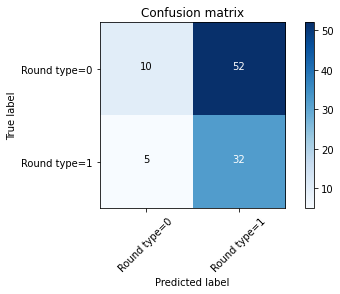

In [126]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Round type=0','Round type=1'],normalize= False,  title='Confusion matrix')

In [127]:
model = log_reg.fit(X_train, y_train)
prediction = model.predict(X_test)
# Check the model performance
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.67      0.16      0.26        62
           1       0.38      0.86      0.53        37

    accuracy                           0.42        99
   macro avg       0.52      0.51      0.39        99
weighted avg       0.56      0.42      0.36        99



In [ ]:
#DEALING WITH IMBALACED DATA--TECHIQUES

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=0)

In [105]:
# Randomly under sample the majority class
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus= rus.fit_resample(X_train, y_train)
# Check the number of records after under sampling
print(sorted(Counter(y_train_rus).items()))

[(0, 121), (1, 121)]


In [106]:
rus_model = log_reg.fit(X_train_rus, y_train_rus)
rus_prediction = rus_model.predict(X_test)
# Check the model performance
print(classification_report(y_test, rus_prediction))

              precision    recall  f1-score   support

           0       0.33      0.03      0.06        62
           1       0.35      0.89      0.51        37

    accuracy                           0.35        99
   macro avg       0.34      0.46      0.28        99
weighted avg       0.34      0.35      0.23        99



Confusion matrix, without normalization
[[ 2 60]
 [ 4 33]]


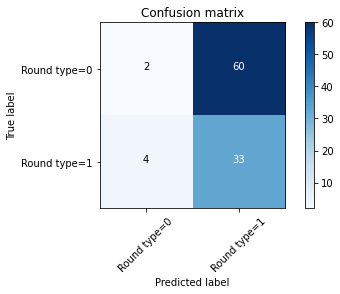

In [107]:
cnf_matrix = confusion_matrix(y_test,rus_prediction , labels=[0,1])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Round type=0','Round type=1'],normalize= False,  title='Confusion matrix')

In [108]:
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros= ros.fit_resample(X_train, y_train)
# Check the number of records after over sampling
print(sorted(Counter(y_train_ros).items()))

[(0, 275), (1, 275)]


In [109]:
ros_model = log_reg.fit(X_train_ros, y_train_ros)
ros_prediction = ros_model.predict(X_test)
# Check the model performance
print(classification_report(y_test, ros_prediction))

              precision    recall  f1-score   support

           0       0.50      0.05      0.09        62
           1       0.37      0.92      0.52        37

    accuracy                           0.37        99
   macro avg       0.43      0.48      0.31        99
weighted avg       0.45      0.37      0.25        99



Confusion matrix, without normalization
[[ 3 59]
 [ 3 34]]


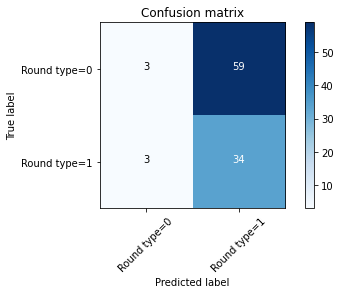

In [110]:
cnf_matrix = confusion_matrix(y_test,ros_prediction , labels=[0,1])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Round type=0','Round type=1'],normalize= False,  title='Confusion matrix')

# SMOTE

In [131]:
smote = SMOTE(random_state=42)

In [136]:
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
smote_model = log_reg.fit(X_train_sm, y_train_sm)
smote_prediction = smote_model.predict(X_test)
# Check the model performance
print(classification_report(y_test, smote_prediction))



              precision    recall  f1-score   support

           0       0.33      0.03      0.06        62
           1       0.35      0.89      0.51        37

    accuracy                           0.35        99
   macro avg       0.34      0.46      0.28        99
weighted avg       0.34      0.35      0.23        99



Confusion matrix, without normalization
[[ 2 60]
 [ 4 33]]


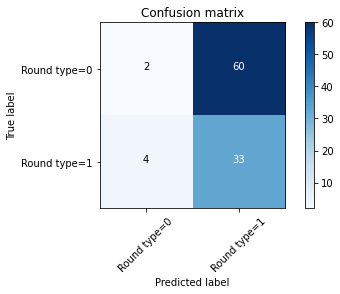

In [137]:
cnf_matrix = confusion_matrix(y_test,smote_prediction, labels=[0,1])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Round type=0','Round type=1'],normalize= False,  title='Confusion matrix')

In [ ]:
y_preds = log_reg.fit(X_train_sm, y_train_sm)
prediction_test = log_reg.predict(X=X_test)

# source: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

# Accuracy on Test
print("Training Accuracy is: ", log_reg.score(X_train_sm, y_train_sm))
# Accuracy on Train
print("Testing Accuracy is: ", log_reg.score(X_test, y_test))

# Confusion Matrix
cm = confusion_matrix(y_test, prediction_test)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=log_reg.classes_)